In [1]:
from skimage.io import imread, imshow, imsave
img = imread('img.png')
print(img.shape[1])

801


In [2]:
x, y = img.shape[0] // 2, img.shape[1] // 2
img[x, y] = [102, 204, 102]
imsave('out_img.png', img)

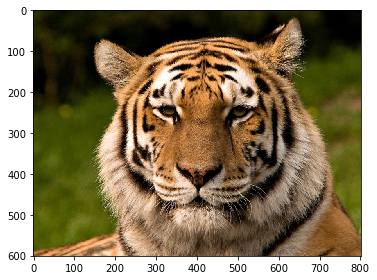

In [4]:
%matplotlib inline
imshow('out_img.png')

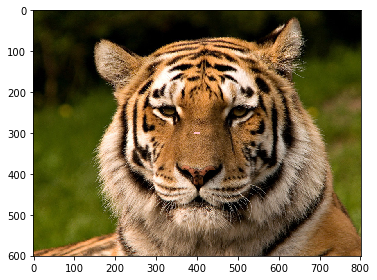

In [5]:
x_center, y_center = img.shape[0]//2, img.shape[1]//2
img[x_center-3:x_center+4, y_center-7:y_center+8] = [255, 192, 203]
imsave('out_img1.png', img)
imshow('out_img1.png')

In [7]:
def compare_colour(pixel, border_colour):
    return True if (pixel[0] == border_colour[0] and
                    pixel[1] == border_colour[1] and
                    pixel[2] == border_colour[2]) else False


img = imread('tiger-border.png')
red, green, blue = img[0, 0]
border_colour = [red, green, blue]
x, y = img.shape[0], img.shape[1]
start_left = 0
count_left = 1
while compare_colour(img[x//2, start_left + 1], border_colour):
    count_left += 1
    start_left += 1
start_top = 0
count_top = 1
while compare_colour(img[start_top + 1, y//2], border_colour):
    count_top += 1
    start_top += 1
start_right = y
count_right = 0
while compare_colour(img[x//2, start_right - 1], border_colour):
    count_right += 1
    start_right -= 1
start_bot = x
count_bot = 0
while compare_colour(img[start_bot - 1, y//2], border_colour):
    count_bot += 1
    start_bot -= 1
print(count_left, count_top, count_right, count_bot)

1 39 25 7


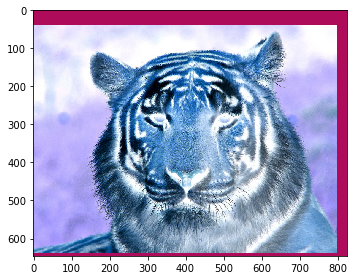

In [10]:
out_img = img.copy()
x, y = img.shape[0], img.shape[1]
for i in range(x):
    for j in range(y):
        out_img[i][j][0] = 255 - out_img[i][j][0]
        out_img[i][j][1] = 255 - out_img[i][j][1]
        out_img[i][j][2] = 255 - out_img[i][j][2]
imsave("negative.png", out_img)
imshow(out_img)

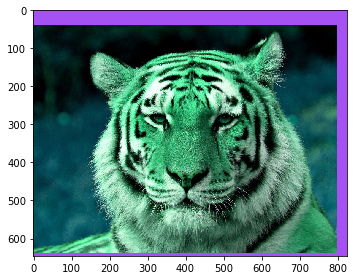

In [12]:
from numpy import dstack
from skimage import img_as_float, img_as_ubyte

f = img_as_float(img)
r = f[:, :, 0]
g = f[:, :, 1]
b = f[:, :, 2]
reverted = dstack((b, r, g))
reverted = img_as_ubyte(reverted)
imsave('reverted.png', reverted)
imshow(reverted)

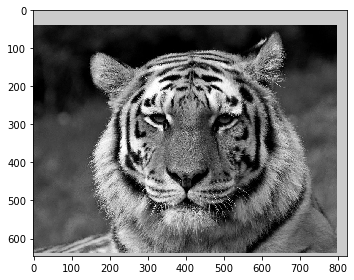

In [14]:
f_image = img_as_float(img)
r = f_image[:, :, 0]
g = f_image[:, :, 1]
b = f_image[:, :, 2]
gray_image = 0.2126 * r + 0.7152 * g + 0.0722 * b
imsave('gray_image.png', img_as_ubyte(gray_image))
imshow(gray_image)